In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

### Random Forest Classifier

In [8]:
if __name__ == '__main__':
    data = pd.read_csv("glcm_features_labelled.csv")
    labels = data['label'].iloc[1:]
    input_data = np.load("glcm_total_features.npy")
    input_data = input_data / input_data.max(axis=0)
    test_data = pd.read_csv("glcm_features_labelled_test.csv")
    test_data_input = np.load("glcm_total_features_test.npy")
    test_data_input = test_data_input / test_data_input.max(axis=0)
    test_labels = test_data['label'].iloc[1:]

    data = np.concatenate((input_data, test_data_input), axis=0)
    labels = np.concatenate((labels, test_labels), axis=0)

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
    print(X_train.shape)
    random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
    random_forest.fit(X_train, y_train.flatten())

    print("Training Accuracy: {:2f} ".format(random_forest.score(X_train, y_train.flatten())*100), "%")
    print("Test Accuracy: {:2f}".format(random_forest.score(X_test, y_test)*100), "%")
    print(classification_report(y_test, random_forest.predict(X_test)))


(5618, 588)
Training Accuracy: 100.000000  %
Test Accuracy: 90.889680 %
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       410
         1.0       0.89      0.95      0.92       349
         2.0       0.82      0.87      0.85       328
         3.0       0.97      0.83      0.89       318

    accuracy                           0.91      1405
   macro avg       0.91      0.90      0.91      1405
weighted avg       0.91      0.91      0.91      1405



## SVM

Training Accuracy: 99.822001  %
Test Accuracy: 93.451957 %
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       399
         1.0       0.95      0.99      0.97       336
         2.0       0.87      0.90      0.89       338
         3.0       0.94      0.86      0.90       332

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.93      0.93      0.93      1405



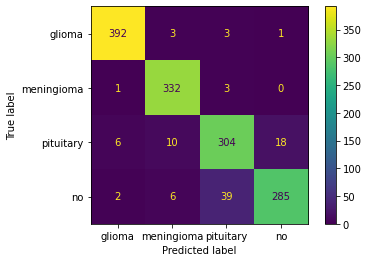

In [3]:
if __name__ == '__main__':
    data = pd.read_csv("glcm_features_labelled.csv")
    labels = data['label'].iloc[1:]
    input_data = np.load("glcm_total_features.npy")
    input_data = input_data / input_data.max(axis=0)
    test_data = pd.read_csv("glcm_features_labelled_test.csv")
    test_data_input = np.load("glcm_total_features_test.npy")
    test_data_input = test_data_input / test_data_input.max(axis=0)
    test_labels = test_data['label'].iloc[1:]

    data = np.concatenate((input_data, test_data_input), axis=0)
    labels = np.concatenate((labels, test_labels), axis=0)

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

    svc_clf = make_pipeline(StandardScaler(), SVC(C=5,gamma='auto', max_iter=-1))
    svc_clf.fit(X_train, y_train)

    print("Training Accuracy: {:2f} ".format(svc_clf.score(X_train, y_train)*100), "%")
    print("Test Accuracy: {:2f}".format(svc_clf.score(X_test, y_test)*100), "%")
    print(classification_report(y_test, svc_clf.predict(X_test)))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svc_clf.predict(X_test)), display_labels = ['glioma', 'meningioma', 'pituitary', 'no'])
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()


## Neural Network

In [11]:
data = pd.read_csv("glcm_features_labelled.csv")
labels = data['label'].iloc[1:]
input_data = np.load("glcm_total_features.npy")

test_data = pd.read_csv("glcm_features_labelled_test.csv")
test_data_input = np.load("glcm_total_features_test.npy")
test_labels = test_data['label'].iloc[1:]

input_data = input_data / input_data.max(axis=0)
test_data_input = test_data_input / test_data_input.max(axis=0)

data = np.concatenate((input_data, test_data_input), axis=0)
labels = np.concatenate((labels, test_labels), axis=0)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

X_train = X_train - X_train.mean(axis=0)
X_test = X_test - X_test.mean(axis=0)
X_train = X_train/X_train.std(axis=0)
X_test = X_test/X_test.std(axis=0)
print(X_test.shape)

(1405, 588)


In [12]:
def neural_network(input_shape):
    initializer = tf.keras.initializers.HeNormal()
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tfl.Dense(32, activation='relu', kernel_initializer=initializer)(inputs)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu', kernel_initializer=initializer)(x)
    x = tfl.Dropout(0.4)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu', kernel_initializer=initializer)(x)    
    x = tfl.Dropout(0.6)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(1028, activation='relu', kernel_initializer=initializer)(x)
    x = tfl.Dropout(0.6)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu', kernel_initializer=initializer)(x)
    x = tfl.Dropout(0.6)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu', kernel_initializer=initializer)(x)
    x = tfl.Dropout(0.4)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(32, activation='relu', kernel_initializer=initializer)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

nn = neural_network(X_train.shape[1])
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'], loss=tf.keras.losses.sparse_categorical_crossentropy)

epochs = 100
batch_size = 32
history = nn.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/100
176/176 [==============================] - 5s 17ms/step - loss: 1.5675 - accuracy: 0.2837 - val_loss: 1.1572 - val_accuracy: 0.4819
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 1.1983 - accuracy: 0.4569 - val_loss: 0.9681 - val_accuracy: 0.5516
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.9364 - accuracy: 0.6007 - val_loss: 0.7850 - val_accuracy: 0.6406
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.8059 - accuracy: 0.6620 - val_loss: 0.6777 - val_accuracy: 0.7132
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.7130 - accuracy: 0.7026 - val_loss: 0.6197 - val_accuracy: 0.7701
Epoch 6/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6445 - accuracy: 0.7501 - val_loss: 0.5283 - val_accuracy: 0.8121
Epoch 7/100
176/176 [==============================] - 3s 15ms/step - loss: 0.5879 - accuracy: 0.7786 - val_loss: 0.5182 - val_accuracy:

In [54]:
acc = nn.evaluate(X_test, y_test, verbose = 1)
print(f"Best accuracy achieved = {acc[1]*100}")
print(classification_report(y_test, np.argmax(nn.predict(X_test, batch_size=32), axis=1)))

44/44 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.8854
Best accuracy achieved = 88.54092359542847
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       319
         1.0       0.86      0.81      0.83       337
         2.0       0.90      0.91      0.90       365
         3.0       0.93      0.93      0.93       384

    accuracy                           0.89      1405
   macro avg       0.88      0.88      0.88      1405
weighted avg       0.89      0.89      0.89      1405



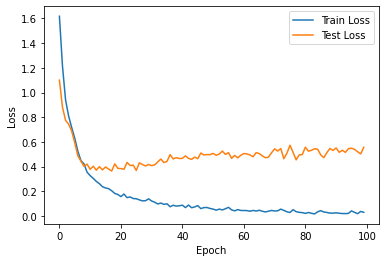

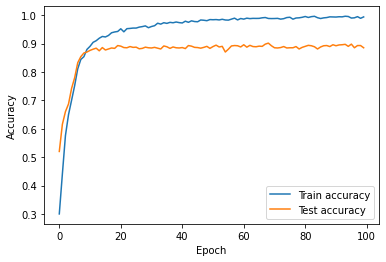

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]
x =  history.epoch

plt.figure()
plt.plot(x, train_loss, label='Train Loss')
plt.plot(x, val_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(x, train_accuracy, label="Train accuracy")
plt.plot(x, val_accuracy, label="Test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

